In [81]:
import sys
sys.dont_write_bytecode = True

import math
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from lib.utils import imshow
from skimage.exposure import histogram
from skimage.feature import canny
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma)
from scipy import ndimage as ndi

%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')
import warnings
warnings.filterwarnings('ignore')

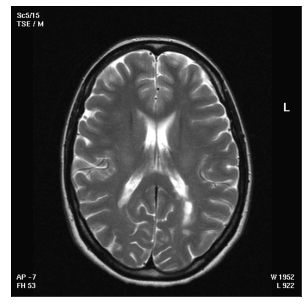

In [82]:
image = cv.imread('./images/Initial & repeat MRI in MS-Free Dataset/AA/1/IM_00037.TIF')
im_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

imshow(im_gray)

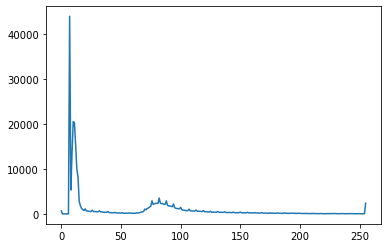

In [83]:
hist, hist_centers = histogram(im_gray)
plt.plot(hist)
plt.show()

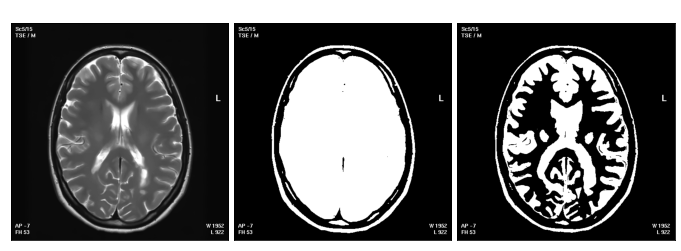

In [109]:
def binarize(img: np.ndarray, threshold: int) -> np.ndarray:
    result = np.zeros_like(img)
    result[img < threshold] = 0
    result[img >= threshold] = 1
    return result

denoised = cv.fastNlMeansDenoising(im_gray, h = 7)

imshow(
    denoised,
    binarize(denoised, 60),
    binarize(denoised, 90),
    titles = ['Desnoised', 'Bin (Threshold = 60)', 'Bin (Threshold = 90)'],
    titleColor = 'white',
    cols = 4
)

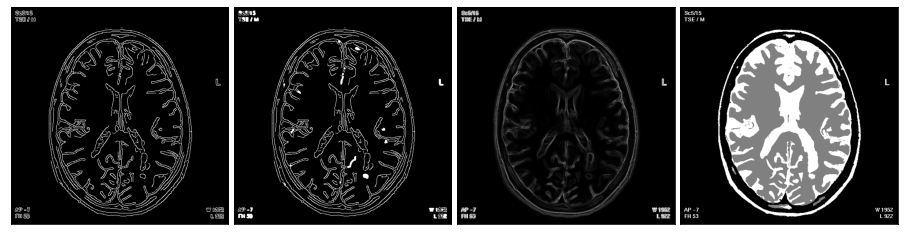

In [152]:
edges = canny(denoised/255)
filled = ndi.binary_fill_holes(edges)
elevation_map = sobel(denoised)

markers = np.zeros_like(denoised)
markers[denoised < 13] = 1
markers[denoised > 90] = 2
markers[denoised >= 100] = 3

segmentation = watershed(elevation_map, markers)
# segmentation = ndi.binary_fill_holes(segmentation - 1)
# labeled, _ = ndi.label(segmentation)
imshow(edges, filled, elevation_map, segmentation, cols=4)